In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
Customer = pd.read_csv("Customer Acqusition.csv")
Repayment = pd.read_csv("Repayment.csv")
spend = pd.read_csv("spend.csv")

In [3]:
Repayment.drop("Unnamed: 4", inplace =True, axis = 1)
Repayment.at[0, "SL No:"] = 1
Repayment.dropna(inplace = True)
Repayment

,SL No:,Customer,Month,Amount
0,1.0,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


In [4]:
Customer.info()
Repayment.info()
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SL No:    1500 non-null   float64
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(2), object(2)
memory usage: 58.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15

### 1. In the above dataset

####  a. In case age is less than 18, replace it with mean of age values.

In [5]:
mean_age = Customer["Age"].mean()
Customer["Age"] = Customer["Age"].apply(lambda x : mean_age if x < 18 else x)
Customer["Age"] = Customer["Age"].astype(int)

In [6]:
Customer[Customer["Age"] == 46]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,46,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,41,A41,46,COCHIN,Platimum,500000.0,C23,Govt
53,54,A54,46,COCHIN,Platimum,500000.0,C16,Normal Salary
62,63,A63,46,BANGALORE,Gold,500000.0,C25,Self Employed
67,68,A68,46,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,70,A70,46,BOMBAY,Platimum,10001.0,C32,Self Employed
89,90,A90,46,COCHIN,Gold,500000.0,C13,Govt


#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 

In [7]:
# merging customer and spend table
customer_spend = spend.merge(Customer, left_on = "Customer", right_on = "Customer", how = "left" )
customer_spend.drop("No",axis =1 , inplace =True )
# adding new coloum with new limit
customer_spend["spend_amount"] = customer_spend.apply(lambda x : x["Limit"]*.50 if x["Limit"] < x["Amount"] else x["Amount"], axis = 1)
# values with exceeded limit
customer_spend[customer_spend["Limit"]< customer_spend["Amount"] ]


,Sl No:,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment,spend_amount
7,8,A8,5-Feb-04,BIKE,155562.58,67,PATNA,Silver,100002.0,C8,Salaried_Pvt,50001.0
18,19,A19,4-Apr-05,FOOD,441442.26,27,BANGALORE,Platimum,10000.0,C19,Salaried_Pvt,5000.0
19,20,A20,30-Apr-06,JEWELLERY,356733.48,27,CALCUTTA,Platimum,10001.0,C20,Govt,5000.5
20,21,A21,25-Apr-04,PETRO,190011.63,57,COCHIN,Platimum,10002.0,C21,Normal Salary,5001.0
21,22,A22,19-Apr-06,CLOTHES,423672.50,27,BOMBAY,Silver,100000.0,C22,Self Employed,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1486,A59,15-Jan-04,FOOD,181115.20,74,BANGALORE,Silver,100003.0,C21,Normal Salary,50001.5
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10,46,TRIVANDRUM,Silver,100000.0,C30,Self Employed,50000.0
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44,33,CALCUTTA,Platimum,10000.0,C31,Self Employed,5000.0
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94,46,BOMBAY,Platimum,10001.0,C32,Self Employed,5000.5


#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit

In [8]:
# merging Repayment table to customer spend 
customer_repayment = Customer.merge(Repayment, left_on = "Customer" , right_on = "Customer" , how = "left")
customer_repayment.drop("SL No:", inplace =True , axis = 1)
customer_repayment = customer_repayment.rename(columns={"Amount": "Repayment_amount"})
#updated repayment amount
customer_repayment["updated_Amount"] = customer_repayment.apply(lambda x : x["Repayment_amount"] if x["Limit"] > x["Repayment_amount"] else x["Limit"] , axis = 1)
customer_repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Repayment_amount,updated_Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88,165972.88
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30,100000.00
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90,10000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57,10001.00
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,25682.73,10002.00


### 2. From the above dataset create the following summaries:

#### a. How many distinct customers exist?

In [9]:
num_of_cust = Customer["Customer"].nunique()
print(f" No.of distinct customer is {num_of_cust}")

 No.of distinct customer is 100


####  b. How many distinct categories exist?


In [10]:
num_of_cat = Customer["Product"].nunique()
print(f" No.of distinct categories is {num_of_cat}")

 No.of distinct categories is 3


#### c. What is the average monthly spend by customers?


In [11]:
avg_spend =  round(customer_spend["Amount"].mean(),2)
print(f" The average monthly spend by a customer is  {avg_spend}")


 The average monthly spend by a customer is  243096.05


#### d. What is the average monthly repayment by customers?

In [12]:
avg_rapay = round(customer_repayment["Repayment_amount"].mean(),2)
print(f" The average monthly repayment by a customer is  {avg_rapay}")

 The average monthly repayment by a customer is  247890.05


####  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [13]:
# merging customer spend and customer repayment column
Repayment_Spend = customer_repayment.merge(customer_spend, left_on=["Customer", "Month"], right_on=["Customer", "Month"], how="left")
# droping all the duplicated columns
Repayment_Spend.drop(["Sl No:","Age_y","City_y","Product_y","Limit_y","Company_y","Segment_y",],axis = 1, inplace = True)
#renaming columns
Repayment_Spend =Repayment_Spend.rename(columns = {"Age_x" : "Age","City_x" :"City", "Product_x" : "Product" , "Limit_x" : "Limit", "Company_x" : "Company" , "Company_x" : "Company","Segment_x" : "Segment", "updated_Amount" : "updated_repay_Amount", "Month" : "Date"})
# calculating monthly profit
Repayment_Spend["monthly_profit"] = Repayment_Spend["updated_repay_Amount"] - Repayment_Spend["spend_amount"]
# instrest earned by bank on monthly profit
Repayment_Spend["Intrest"] = Repayment_Spend.apply(lambda x : x["monthly_profit"]*0.029 if x["monthly_profit"] > 0 else 0 ,axis = 1)
# conveting month to date time
Repayment_Spend["Date"] = pd.to_datetime(Repayment_Spend["Date"], format = ("%d-%b-%y"))
#calling month from date
Repayment_Spend["Month"] = Repayment_Spend["Date"].dt.month
Repayment_Spend["Month"] = pd.to_datetime(Repayment_Spend["Month"], format = ("%m"))
Repayment_Spend["Month"] = Repayment_Spend["Month"].dt.strftime("%B")
monthly_profit = round(Repayment_Spend.groupby("Month")["Intrest"].sum(),2).sort_values(ascending = False)
monthly_profit


Month
January      677814.12
February     324293.62
May          210492.79
March        177609.11
April         82555.43
November      67428.20
July          27938.34
September     24369.38
June          23986.56
October       22470.92
December      15519.54
August        15287.12
Name: Intrest, dtype: float64

#### f. What are the top 5 product types?

In [14]:
top_5_product_type = Repayment_Spend.groupby("Type")["spend_amount"].sum().sort_values(ascending = False).head(5)
top_5_product_type

Type
CAMERA          19943003.00
PETRO           13667106.67
FOOD            12888728.98
BUS TICKET      11449175.92
MOVIE TICKET    10123108.77
Name: spend_amount, dtype: float64

####  g. Which city is having maximum spend?

In [15]:
max_spend_city = Repayment_Spend.groupby("City")["spend_amount"].sum().idxmax()
print(f"The city with the highest spend is {max_spend_city}")

The city with the highest spend is COCHIN


#### h. Which age group is spending more money?


In [16]:
age_group = Repayment_Spend.groupby("Age")["spend_amount"].sum()
age_group = age_group.idxmax()
print(f"The age group with the highest spend is: {age_group}")

The age group with the highest spend is: 28


#### i. Who are the top 10 customers in terms of repayment?

In [17]:
top_10_cust =  Repayment_Spend.groupby("Customer")["updated_repay_Amount"].sum().sort_values(ascending = False).head(10)
top_10_cust

Customer
A60    14247712.08
A61    12639553.00
A13    11904605.14
A44    11742878.29
A43    11242328.32
A45    11078020.75
A38    10154349.88
A14     9676289.74
A42     9456592.25
A12     9297660.19
Name: updated_repay_Amount, dtype: float64

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

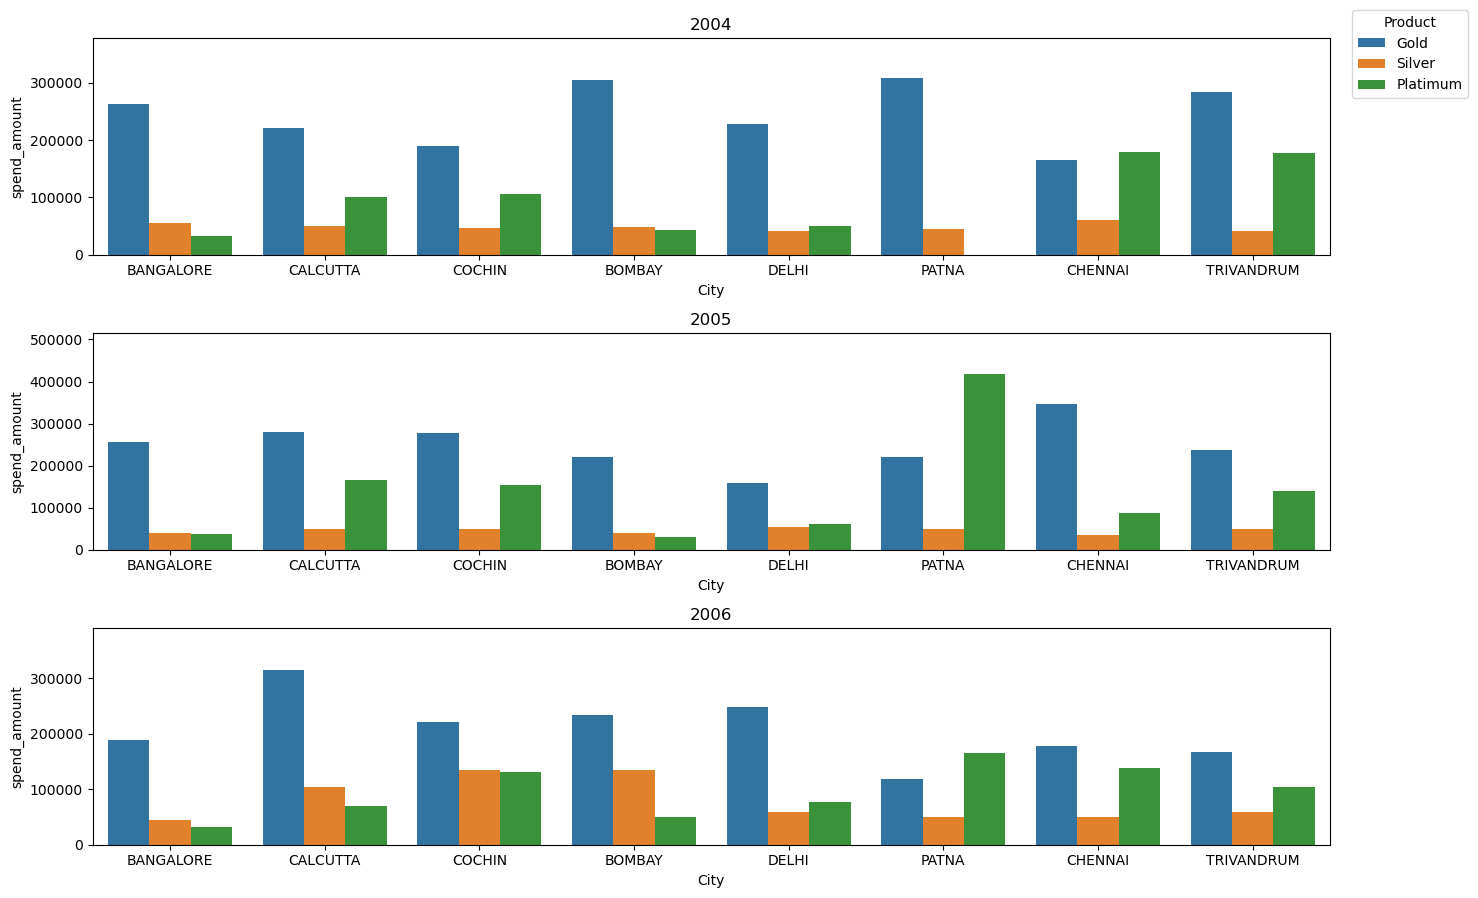

In [18]:
Repayment_Spend["year"] = Repayment_Spend["Date"].dt.year
fig, axs = plt.subplots(3, 1, figsize=(13.5, 9))
years = Repayment_Spend["year"].unique()
for i, year in enumerate(years):
    sns.barplot(data=Repayment_Spend[Repayment_Spend["year"] == year], x="City", y="spend_amount", hue="Product", ax=axs[i],errwidth = 0,)
    axs[i].set_title(year)
    axs[i].get_legend().remove()
    

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels ,bbox_to_anchor=(1, 1), loc='upper left', title = "Product")
plt.tight_layout()
plt.show()




### 4. Create graphs for

 

####  a. Monthly comparison of total spends, city wise

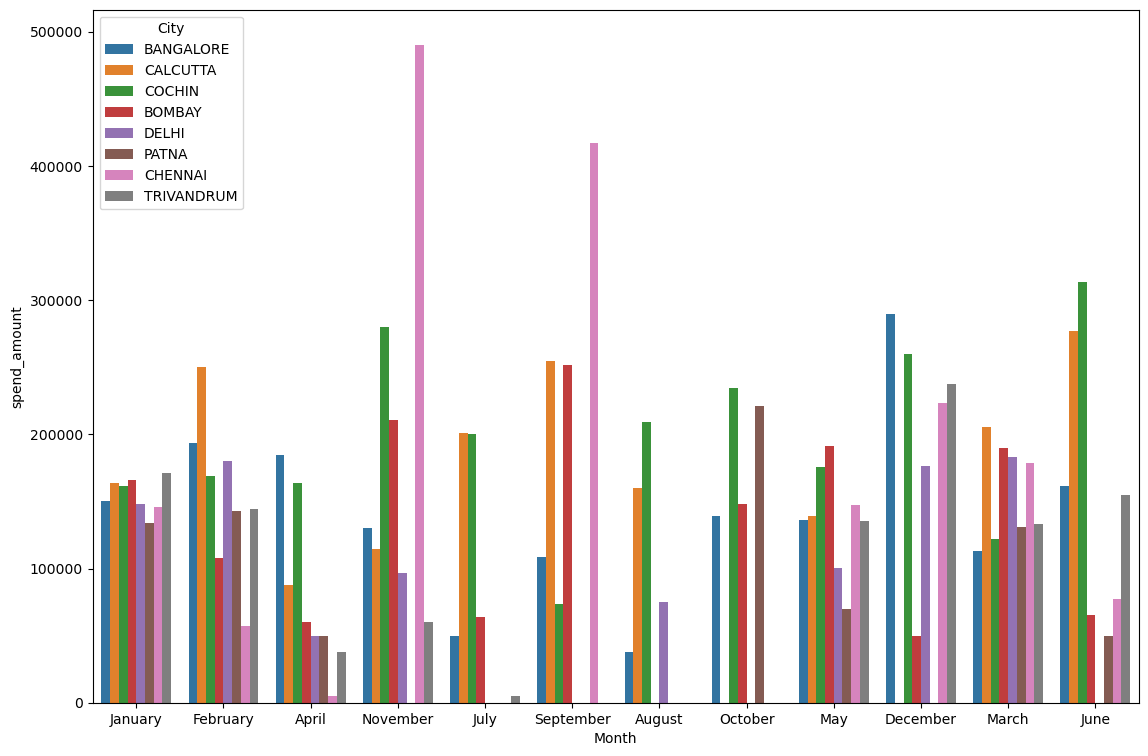

In [19]:
plt.figure(figsize = (13.5,9))

sns.barplot(x='Month', y='spend_amount', hue='City', data=Repayment_Spend, errwidth = 0)



plt.show()

#### b. Comparison of yearly spend on air tickets

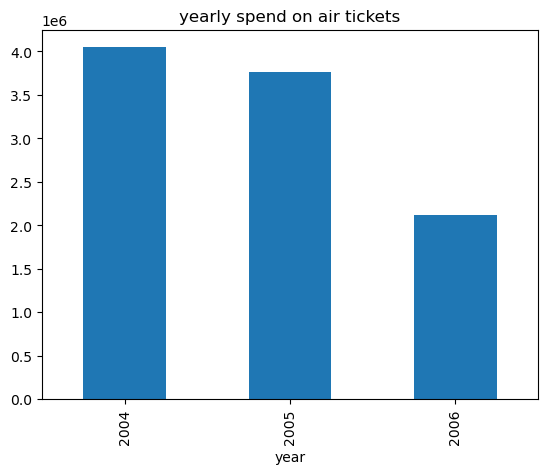

In [20]:
air_ticket = Repayment_Spend[Repayment_Spend["Type"] == "AIR TICKET"] 
air_ticket_spend = air_ticket.groupby("year")["spend_amount"].sum()
air_ticket_spend.plot(kind = "bar")
plt.title('yearly spend on air tickets')
plt.show()

#### c. Comparison of monthly spend for each product 

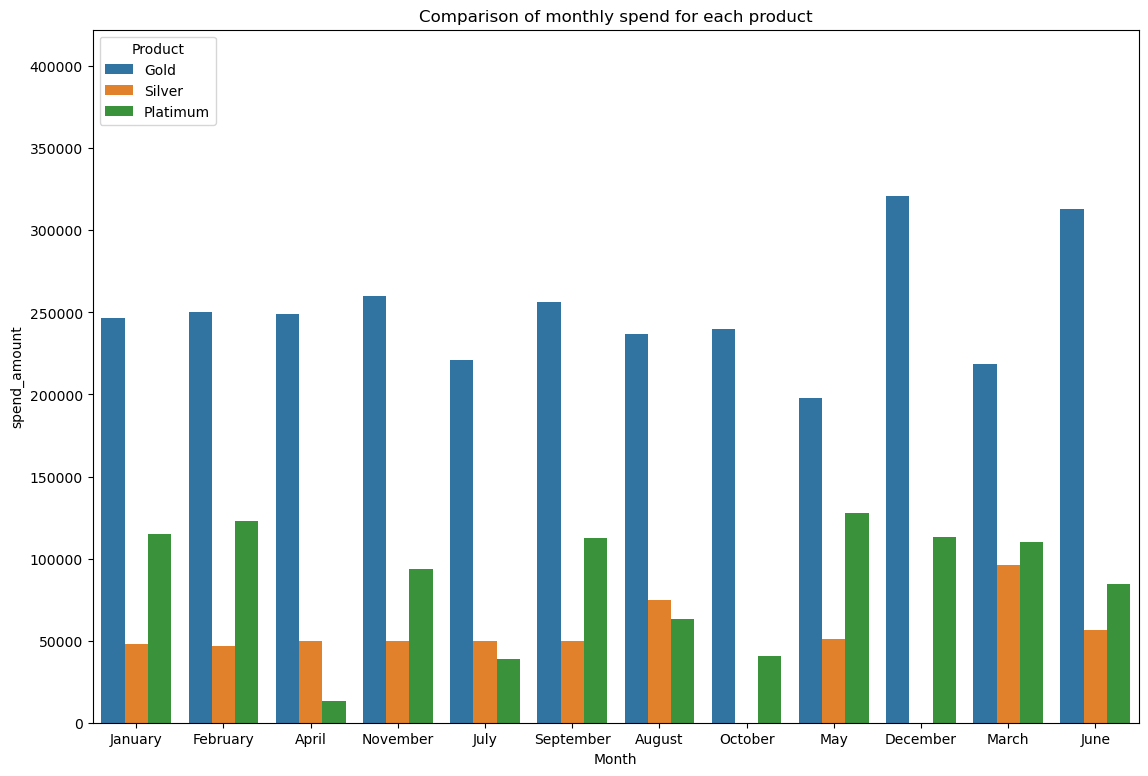

In [21]:
# CREATE A STACKED BAR CHART
plt.figure(figsize = (13.5,9))
sns.barplot(data = Repayment_Spend, x = "Month", y  = "spend_amount", hue = "Product", errwidth = 0, )
plt.title("Comparison of monthly spend for each product")
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis:


In [73]:
def top_10_cust(df,product,time_period):
    df = df[df["Product"] == product]
    df.reset_index(inplace = True)
    if time_period == "yearly":
        df =df.groupby(["City","year","Customer"]).agg({"updated_repay_Amount" : "sum"})
        df.reset_index(inplace = True)
    elif time_period == "monthly":
        df =df.groupby(["City","Month","Customer"]).agg({"updated_repay_Amount" : "sum"})
        df.reset_index(inplace = True)
    else:
        return "Invalid time period. Please specify 'yearly' or 'monthly'"
    top_10_dict = {}
    for city in df["City"].unique():
        city_df = df[df["City"] == city]
        city_df = city_df.sort_values("updated_repay_Amount", ascending=False)
        city_df = city_df.reset_index(drop=True)
        top_10 = city_df.head(10)["Customer"].tolist()
        top_10_dict[city] = top_10
    return top_10_dict


In [74]:
top_10_dict = top_10_cust(Repayment_Spend, "Gold", "monthly")
print(top_10_dict)



        

{'BANGALORE': ['A1', 'A13', 'A43', 'A30', 'A13', 'A14', 'A43', 'A14', 'A43', 'A14'], 'BOMBAY': ['A42', 'A42', 'A12', 'A17', 'A12', 'A62', 'A12', 'A62', 'A17', 'A12'], 'CALCUTTA': ['A60', 'A29', 'A60', 'A60', 'A15', 'A15', 'A29', 'A15', 'A10', 'A31'], 'CHENNAI': ['A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27', 'A27'], 'COCHIN': ['A45', 'A61', 'A61', 'A61', 'A45', 'A16', 'A45', 'A11', 'A16', 'A11'], 'DELHI': ['A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A44', 'A93', 'A82'], 'PATNA': ['A26', 'A26', 'A26', 'A26', 'A66', 'A26', 'A26', 'A26', 'A95', 'A26'], 'TRIVANDRUM': ['A28', 'A28', 'A28', 'A28', 'A28', 'A28', 'A28', 'A28']}
